# Άσκηση 2

## Παναγιώτης Τσιάβος Α.Μ. 2396

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
R = np.array(Image.open('brain.png'))
R.shape

(101, 101)

Text(0.5, 1.0, 'Brain')

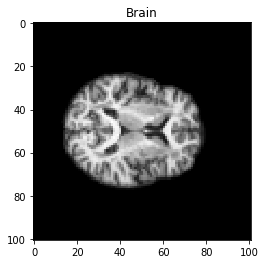

In [3]:
plt.imshow(R, cmap='gray')
plt.title('Brain')

## Affine Transformation (6-DoF)
Η παρακάτω συνάρτηση εφαρμόζει αφινικό μετασχήματισμό σε εικόνα, πέρνοντας σαν είσοδο την εικόνα καθώς και 6 (από τις 9) τιμές του αφινικού πίνακα.   (οι τιμές α7,α8,α9  είναι πάντα 0,0,1)
$$
\begin{bmatrix} 
x^{'} \\ 
y^{'} \\ 
w^{'} \\ 
\end{bmatrix}
=
\begin{bmatrix} 
a_{1} & a_{2} & a_{3} \\
a_{4} & a_{5} & a_{6}\\
a_{7} & a_{8} & a_{9} \\
\end{bmatrix}
\begin{bmatrix} 
x\\
y\\
w\\ 
\end{bmatrix}\\
x^{'} = a_{1}\ast x + a_{2}\ast y + a_{3}\ast w \\
y^{'} = a_{4}\ast x + a_{5}\ast y + a_{6}\ast w \\
6-DOF: w=1
$$





Η συνάρτηση θεωρεί ως αρχή των αξόνων το εικονοστοιχείο που βρίσκεται στο μέσο της εικόνας (x = r - R.shape[0]/2, y = c - R.shape[1]/2), και μετασχηματίζει τη γραμμη,στηλη ως προς τον αφινικό πίνακα και τα αναθέτει  σε έναν καινούργιο πίνακα/εικόνα , έχοντας κάνει μια παρεμβολή των τιμών τους πριν (round(), κοντινότερος γείτονας), καθώς και εναν έλεγχο (αμα ειναι in range της εικόνας/πινακα).

In [4]:
def affine_transformation(R, a1, a2, a3, a4, a5, a6):
    ret = np.zeros(R.shape)   # Array to return

    for r in range(R.shape[0]):
        for c in range(R.shape[1]):
            # Get x,y based on center 
            x = r - R.shape[0]/2  
            y = c - R.shape[1]/2
            
            # Apply affine matrix  (x', y')
            aff_x = a1*x+a2*y+a3
            aff_y = a4*x+a5*y+a6
            
            # Map new position (based on center) and round it up to get the closest
            mapped_r = round(aff_x + R.shape[0]/2)
            mapped_c = round(aff_y + R.shape[1]/2)
            

            # Check if new positions are inside Images range and 
            # store the values of these positions to the ouput array
            if mapped_r in range(0,R.shape[0]) and mapped_c in range(0,R.shape[1]):
                ret[r][c]=R[mapped_r][mapped_c]
    
    return ret

### Identity transformation 
Μετασχηματίζουμε την εικόνα βγάζοντας πάλι την αρχική.  
Oι τιμές του αφινικού πίνακα :
$$
\begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}$$

$$x^{'} = x$$
$$y^{'} = y$$

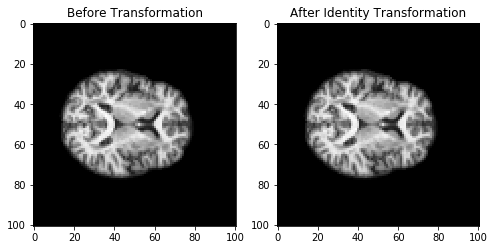

In [5]:
ident = affine_transformation(R.copy(), 1, 0, 0, 0, 1, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,9))
ax1.imshow(R, cmap='gray')
ax1.title.set_text('Before Transformation') 
ax2.imshow(ident, cmap='gray')
ax2.title.set_text('After Identity Transformation') 

### Translation
Είναι ένας γεωμετρικός μετασχηματισμός που μετακινεί κάθε σημείο ενός σχήματος ως προς την ίδια απόσταση (και ίδια κατεύθυνση).  
Οι τιμές του αφινικού πίνακα:  
$$
\begin{bmatrix} 
1 & 0 & t_{x}>0\\
0 & 1 & t_{y}\\
0 & 0 & 1 \\
\end{bmatrix}$$

$$x^{'} = x + t_{x}$$
$$y^{'} = y + t_{y}$$

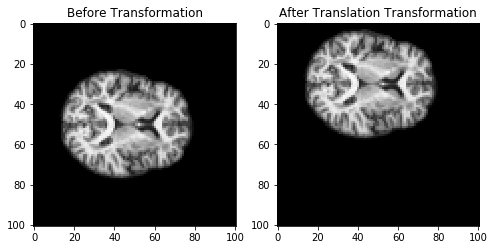

In [6]:
trans = affine_transformation(R.copy(), 1, 0, 20, 0, 1, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,9))
ax1.imshow(R, cmap='gray')
ax1.title.set_text('Before Transformation') 
ax2.imshow(trans, cmap='gray')
ax2.title.set_text('After Translation Transformation') 

### Scale transformation
Είναι ένας γραμμικός μετασχηματισμός που μεγεθύνει (αυξάνει) ή συρρικνώνει (μειώνει) τα αντικείμενα. Οι τιμές του αφινικού πίνακα:

$$
\begin{bmatrix} 
c_{x} & 0 & 0 \\
0 & c_{y} & 0\\
0 & 0 & 1 \\
\end{bmatrix}$$

$$x^{'} = c_{x}\ast x$$
$$y^{'} = c_{y}\ast y$$

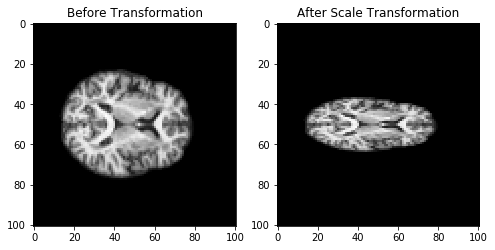

In [7]:
scale = affine_transformation(R.copy(), 2, 0, 0, 0, 1, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,9))
ax1.imshow(R, cmap='gray')
ax1.title.set_text('Before Transformation') 
ax2.imshow(scale, cmap='gray')
ax2.title.set_text('After Scale Transformation') 

### Rotation
Περιστροφή μιάς εικόνας ως προς μια γωνία Θ (Η περιστροφή συνήθως γίνεται ως προ το κέντρο τον αξόνων βέβαια εδώ θα είναι γύρω από το κέντρο της εικόνας).   
Οι τιμές του αφινικού πίνακα:
$$
\begin{bmatrix} 
\cos{\theta} & -\sin{\theta} & 0 \\
\sin{\theta} & \cos{\theta} & 0\\
0 & 0 & 1 \\
\end{bmatrix}$$

$$x^{'} = x \ast \cos{\theta} - y \ast \sin{\theta} \\ 
y^{'} = x \ast \sin{\theta} + y \ast \cos{\theta}
$$


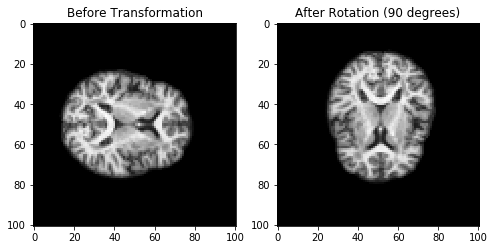

In [8]:
# Rotation of 90 degrees
rot = affine_transformation(R.copy(), 0, -1, 0, 1, 0, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,9))
ax1.imshow(R, cmap='gray')
ax1.title.set_text('Before Transformation') 
ax2.imshow(rot, cmap='gray')
ax2.title.set_text('After Rotation (90 degrees)') 

### Shearing
Mετατοπίζει κάθε σημείο σε σταθερή κατεύθυνση κατά μια ποσότητα ανάλογη προς την απόσταση απο τη γραμμή που είναι παράλληλη σε αυτή την κατεύθυνση και διαπερνά το σημείο.  
Οι τιμές του αφινικού πίνακα:

$$Horizontal Shear\\
\begin{bmatrix} 
1 & s_{h} & 0 \\
0 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}
\quad
x^{'} = x + s_{h}\ast y,
\quad \quad
y^{'} = y
$$

$$Vertical Shear\\
\begin{bmatrix} 
1 & 0 & 0 \\
s_{v} & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}
\quad 
x^{'} = x ,
\quad \quad
y^{'} = x\ast s_{v} + y
$$

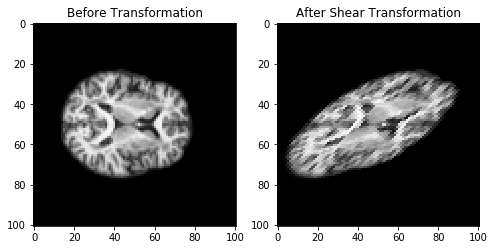

In [9]:
shear = affine_transformation(R.copy(), 1, 0, 0, 1, 1, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,9))
ax1.imshow(R, cmap='gray')
ax1.title.set_text('Before Transformation') 
ax2.imshow(shear, cmap='gray')
ax2.title.set_text('After Shear Transformation') 